In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [5]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
# 0 : malignant(悪性)
# 1 : benign(良性)

In [7]:
df['y'] = bc.target

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
juge_count = len(np.where(df['y'] == 0)[0])
benign_count = len(np.where(df['y'] == 1)[0])

print('悪性:{}'.format(juge_count))
print('良性:{}'.format(benign_count))

悪性:212
良性:357


In [11]:
df.shape

(569, 31)

In [12]:
X = df.iloc[:, :30]
y = df.iloc[:, -1]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
bc_column = df.columns[:30]


forest = RandomForestClassifier(n_estimators=500, random_state=0)

forest.fit(X_train, y_train)

importance = forest.feature_importances_
indices = np.argsort(importance)


/Users/kobayashi/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, bc_column[indices[f]], importance[indices[f]]))

 1) mean fractal dimension         0.003063
 2) mean symmetry                  0.004458
 3) smoothness error               0.004509
 4) texture error                  0.004692
 5) compactness error              0.005274
 6) concave points error           0.005426
 7) symmetry error                 0.005619
 8) fractal dimension error        0.005855
 9) concavity error                0.006045
10) mean smoothness                0.006877
11) worst fractal dimension        0.007716
12) worst smoothness               0.010495
13) worst symmetry                 0.010830
14) perimeter error                0.012984
15) worst compactness              0.014116
16) mean texture                   0.015443
17) mean compactness               0.016508
18) worst texture                  0.018238
19) radius error                   0.018928
20) worst concavity                0.029842
21) mean area                      0.033541
22) mean radius                    0.037437
23) area error                  

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

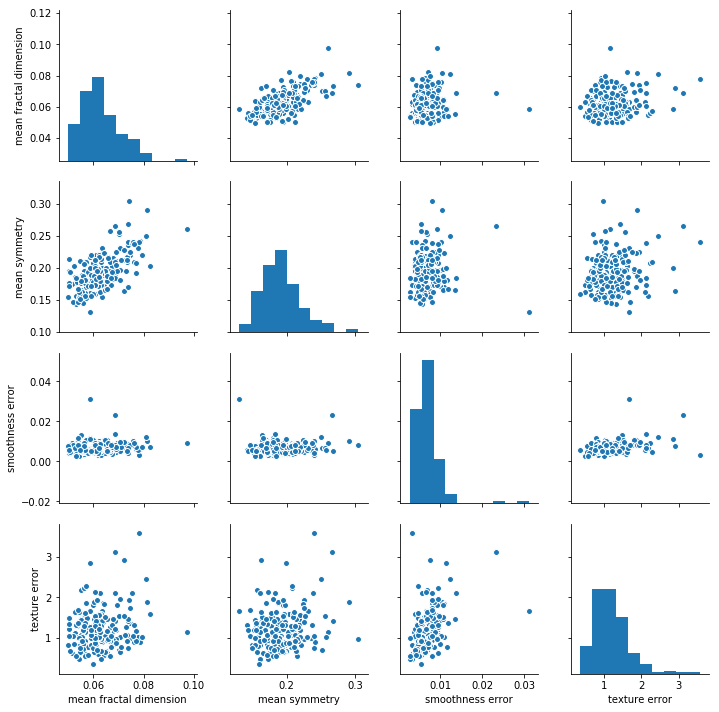

In [21]:
x = df[df['y'] == 0].iloc[:, indices[:4]][:200]
y = df[df['y'] == 1].iloc[:, indices[:4]][:200]

sns.pairplot(x)

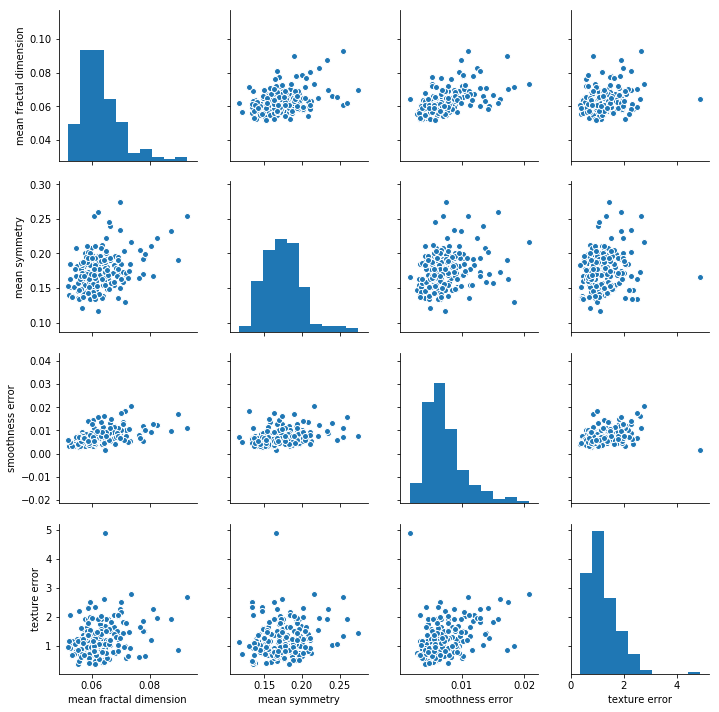

In [20]:
sns.pairplot(y)

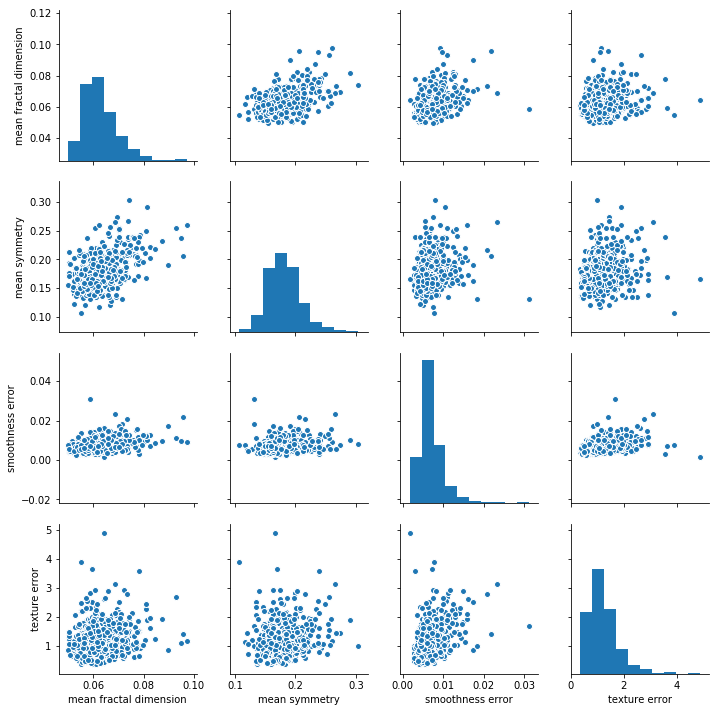

In [24]:
x_1 = df.iloc[:, indices[:4]]
sns.pairplot(x_1)

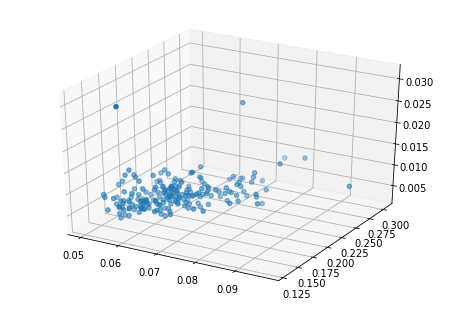

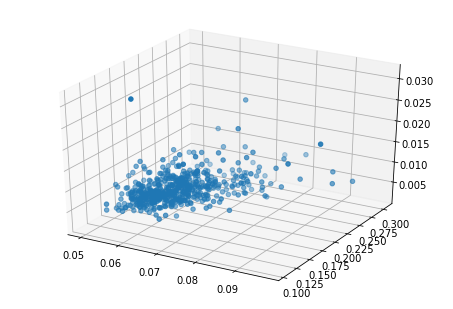

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_1.iloc[:, 0], x_1.iloc[:, 1], x_1.iloc[:, 2])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression(random_state=0)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr.score(X_test, y_test) #モデルの精度率

0.956140350877193

In [132]:
X_test.shape

(114, 30)

In [133]:
X_decison = lr.decision_function(X_test) #境界線との距離を表している　　近いと分類が曖昧、遠いと分類がはっきりとしている
X_decison

array([ -4.84353774,   3.46423586,   6.15386541,   1.4947256 ,
         9.43175058,   5.81537068,   4.92769146,   6.4087769 ,
         3.33450507,   8.45993264,   0.44779723,   1.66401893,
         5.52621651,  -1.17704977,   1.40199293,  -4.74595354,
         4.16638718, -20.29359312,  -6.44336186, -26.743185  ,
       -10.28270837,  -2.31720408,   6.3802654 ,   4.49088485,
        -4.91729723,   4.55086726,   6.27632798,  -1.51493675,
         5.72072653, -24.08471852,   7.93488362, -17.83132392,
         0.56076024,  -7.52410543,   8.56208151,  -6.51253687,
         2.500099  , -13.15983753,   5.45619283,  -7.95307531,
        -2.83568456,   5.44340126,  -6.16913709,   7.0310384 ,
        -2.58893164, -27.70510985,   8.09883565,   3.53251158,
         6.71547429,  -7.98815427, -12.49963666,  -0.66426945,
       -14.79070751,   5.44489176,   4.76182968,   6.96955362,
         4.21474365,   3.74632729,   4.06625195, -38.53696456,
        -4.17871306,  -9.8518854 ,   6.16009071,   5.34

Text(0,0.5,'X_dection_error')

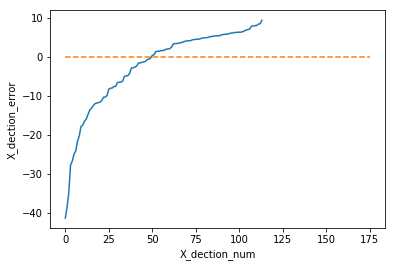

In [134]:
plt.plot(np.sort(X_decison))
plt.plot([0, 175], [0, 0], linestyle='--')
plt.xlabel('X_dection_num')
plt.ylabel('X_dection_error')

In [135]:
#上の表から、決定境界線との距離はマイナスであれば広く、プラスの場合は浅いことがわかる。

In [136]:
X_10 =  X_decison[-0.2 < X_decison]
X_0 = X_10[X_10 < 0.2]
for i, num in enumerate(np.sort(X_decison)):
    for r in X_0:
        if r == num:
            print(i)
    

In [137]:
np.sort(X_decison)[67]

3.7463272860115793

In [138]:
len(X_decison)

114

In [139]:
def sigmoid(x):
    return 1/  (1+ np.exp(-x))

In [140]:
#もっとも0に近いのは、67番目の値（１から始めれば68番目)　　
#分類ははっきりでもなければ、曖昧というわけでもないと言える

In [141]:
X_sigmoid = sigmoid(X_decison) #数値はでかいが e-01と書かれているため、実際は0.・・・のようになる
X_sigmoid

array([7.81753496e-03, 9.69652860e-01, 9.97879256e-01, 8.16786499e-01,
       9.99919868e-01, 9.97027487e-01, 9.92808882e-01, 9.98355671e-01,
       9.65593754e-01, 9.99788259e-01, 6.10115379e-01, 8.40776759e-01,
       9.96034763e-01, 2.35583070e-01, 8.02499946e-01, 8.61196471e-03,
       9.84728644e-01, 1.53675449e-09, 1.58852138e-03, 2.42986600e-12,
       3.42185526e-05, 8.97081143e-02, 9.98308194e-01, 9.88913567e-01,
       7.26570854e-03, 9.89552264e-01, 9.98123236e-01, 1.80208320e-01,
       9.96733377e-01, 3.46848363e-11, 9.99642095e-01, 1.80282847e-08,
       6.36628427e-01, 5.39620093e-04, 9.99808816e-01, 1.48250734e-03,
       9.24148760e-01, 1.92643492e-06, 9.95748373e-01, 3.51455720e-04,
       5.54260355e-02, 9.95693874e-01, 2.08866965e-03, 9.99116767e-01,
       6.98541673e-02, 9.28589296e-13, 9.99696200e-01, 9.71598800e-01,
       9.98789456e-01, 3.39344863e-04, 3.72799357e-06, 3.39781191e-01,
       3.77117929e-07, 9.95700260e-01, 9.91522531e-01, 9.99060810e-01,
      

In [142]:
right = []
for i in y_test:
    right.append(i) 

In [143]:
import pandas as pd

cancer_test_df = pd.DataFrame(right, columns=['正解値'])
cancer_test_df['予測値'] =  pd.Series(y_pred)
cancer_test_df['正誤'] =  pd.Series(right == y_pred)
cancer_test_df['決定関数値'] =  pd.Series(X_decison)
cancer_test_df['確率(良性)'] =  pd.Series(X_sigmoid).round(4)
cancer_test_df['良性 or 悪性'] = pd.Series(cancer_test_df['確率(良性)'] >= 0.5)
cancer_test_df.head(20)

,正解値,予測値,正誤,決定関数値,確率(良性),良性 or 悪性
0,0,0,True,-4.843538,0.0078,False
1,1,1,True,3.464236,0.9697,True
2,1,1,True,6.153865,0.9979,True
3,1,1,True,1.494726,0.8168,True
4,1,1,True,9.431751,0.9999,True
5,1,1,True,5.815371,0.9970,True
6,1,1,True,4.927691,0.9928,True
7,1,1,True,6.408777,0.9984,True
8,1,1,True,3.334505,0.9656,True
9,1,1,True,8.459933,0.9998,True


In [123]:
from sklearn.metrics import confusion_matrix

In [124]:
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
confmat

array([[46,  1],
       [ 4, 63]])

In [125]:
#[正解と予測し正解（真陽性）、正解と予測して不正解 （偽陽性）]
#[不正解と予測して正解（偽陰性）、不正解と予測して不正解（真陽性）]

In [126]:
#ロジスティックの寄与率は誤判別式でモデルの精度を決める

In [127]:
#誤判別式は
#事実と分析結果が一致してない個数/全体の個数
#confmatから偽陰性と偽陽性の個数を採用する
(confmat[0][1] + confmat[1][0]) / len(cancer_test_df) #寄与率
#かなり小さいため、精度が高いと言える

0.043859649122807015

In [128]:
lr.coef_ #係数  これが最尤推定値(x1 ~ x30)だと思う

array([[ 3.23517773,  0.15294175, -0.19297185, -0.00751592, -0.8053852 ,
        -0.59494674, -1.14408583, -1.37931359, -1.529207  ,  0.0702526 ,
         0.06074008,  2.0121135 , -0.13112593, -0.11799007, -0.05752991,
         0.9426762 ,  1.10185127, -0.0838643 ,  0.02085054,  0.1947344 ,
         1.1661729 , -0.43129728, -0.09861884, -0.02439887, -1.34410023,
        -1.77167791, -3.04902176, -2.77451237, -2.79768063, -0.12897315]])

In [144]:
lr.intercept_ #切片 (y)

array([0.37161455])